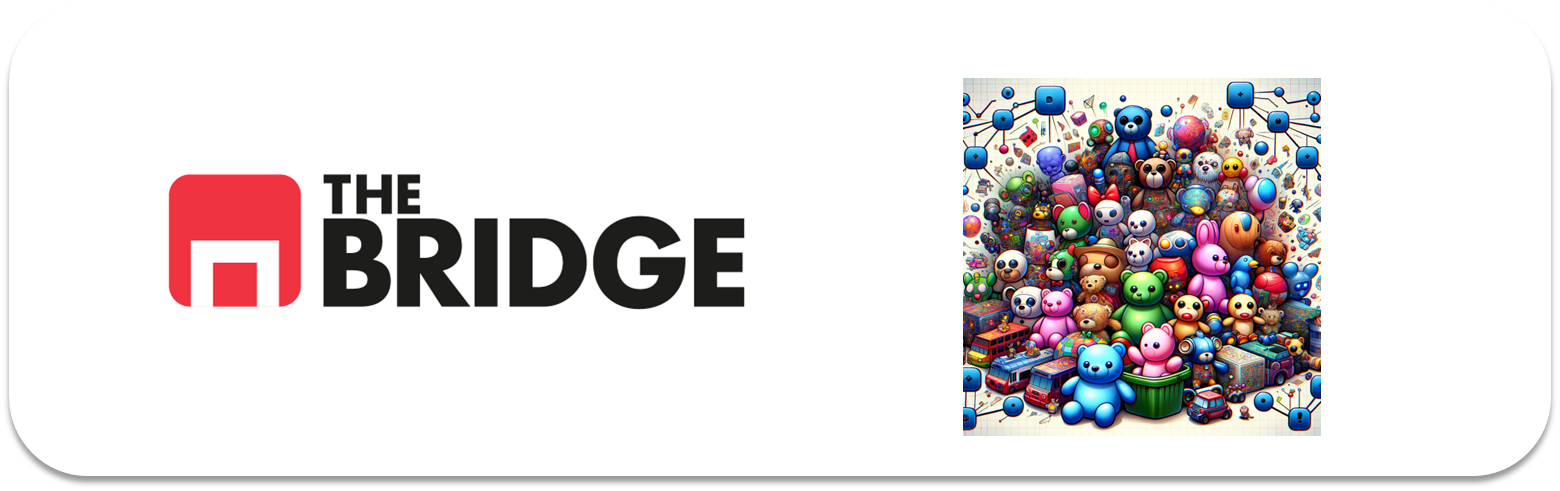

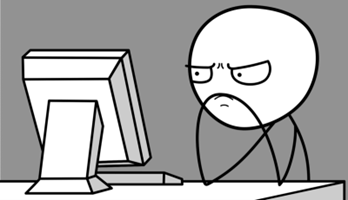

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [8]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [3]:
from sklearn.datasets import fetch_olivetti_faces

In [5]:
# Carga el conjunto de datos
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Usuario\scikit_learn_data


In [6]:
# Muestra la descripción del conjunto de datos
print(faces['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [9]:
olivetti_faces = fetch_olivetti_faces()

# Muestra el target (etiquetas)
print("Target (Etiquetas):")
print(faces['target'])

# Cargar todo en un mismo DataFrame
# Las imágenes están en olivetti_faces['data']
# El target está en olivetti_faces['target']
data = faces['data']
target = faces['target']

# Crear un DataFrame con las imágenes y el target
df = pd.DataFrame(data)
df['target'] = target

# Mostrar las primeras filas del DataFrame
print("\nDataFrame original:")
print(df.head())

# Reordenar aleatoriamente el DataFrame
df_mix = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar las primeras filas del DataFrame reordenado
print("\nDataFrame reordenado aleatoriamente:")
print(df_mix.head())


Target (Etiquetas):
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [10]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento (80%) y conjunto de prueba + validación (20%)
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['target'], random_state=42)

# Dividir el conjunto de prueba + validación en conjunto de validación (10%) y conjunto de prueba (10%)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['target'], random_state=42)

# Mostrar la distribución de las etiquetas en cada conjunto
print("Distribución en el conjunto de entrenamiento:")
print(train_df['target'].value_counts())

print("\nDistribución en el conjunto de validación:")
print(validation_df['target'].value_counts())

print("\nDistribución en el conjunto de prueba:")
print(test_df['target'].value_counts())

Distribución en el conjunto de entrenamiento:
target
13    8
5     8
8     8
0     8
28    8
6     8
31    8
21    8
38    8
25    8
26    8
4     8
30    8
18    8
39    8
14    8
17    8
27    8
29    8
34    8
22    8
15    8
1     8
3     8
12    8
10    8
20    8
24    8
35    8
11    8
9     8
23    8
37    8
32    8
36    8
33    8
16    8
19    8
7     8
2     8
Name: count, dtype: int64

Distribución en el conjunto de validación:
target
29    1
22    1
19    1
1     1
34    1
33    1
25    1
32    1
13    1
39    1
24    1
3     1
17    1
8     1
20    1
6     1
2     1
14    1
15    1
37    1
35    1
11    1
12    1
30    1
16    1
4     1
10    1
9     1
26    1
5     1
38    1
7     1
18    1
23    1
31    1
0     1
28    1
36    1
21    1
27    1
Name: count, dtype: int64

Distribución en el conjunto de prueba:
target
3     1
1     1
37    1
34    1
17    1
12    1
15    1
20    1
39    1
24    1
27    1
22    1
36    1
7     1
14    1
30    1
13    1
35    1
9     1
25   

### #1.4

Crea los pares X,y para train, validation y test.

In [11]:
# Crear los pares X, y para entrenamiento, validación y prueba
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

X_validation = validation_df.drop('target', axis=1)
y_validation = validation_df['target']

X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

# Mostrar las formas de los conjuntos de datos para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_validation:", X_validation.shape)
print("Forma de y_validation:", y_validation.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (320, 4096)
Forma de y_train: (320,)
Forma de X_validation: (40, 4096)
Forma de y_validation: (40,)
Forma de X_test: (40, 4096)
Forma de y_test: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [13]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

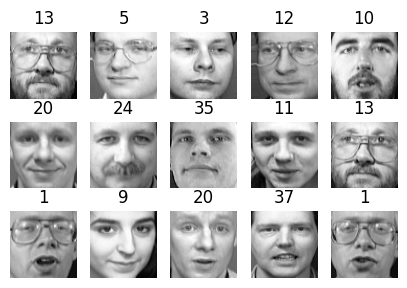

In [14]:
# Visualizar algunas caras del conjunto de entrenamiento
plot_faces(X_train.iloc[:15].values, y_train.iloc[:15].values)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_validation)
X_test_pca = pca.transform(X_test)

pca.n_components_

222

In [16]:
# Mostrar el número de componentes principales seleccionados
print("Número de componentes principales seleccionados:", pca.n_components_)

Número de componentes principales seleccionados: 222


### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

El mejor número de clusters según el score de silueta es 145 con un score de silueta de 0.20


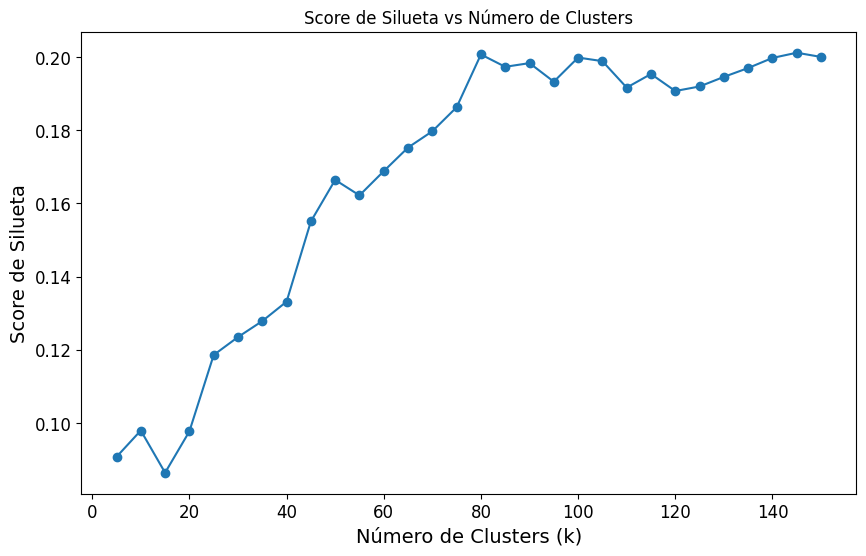

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Encontrar el mejor número de clusters usando el score de silueta
silhouette_scores = []
inertia_values = []
k_values = range(5, 151, 5)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia_values.append(kmeans.inertia_)
    #print(f"Para k = {k}, el score de silueta promedio es {silhouette_avg}")

# Determinar el k con el mejor score de silueta
best_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
best_silhouette_score = max(silhouette_scores)
print(f"El mejor número de clusters según el score de silueta es {best_k_silhouette} con un score de silueta de {best_silhouette_score:.2f}")

# Graficar el score de silueta para cada k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Score de Silueta vs Número de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Score de Silueta")
plt.show()

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

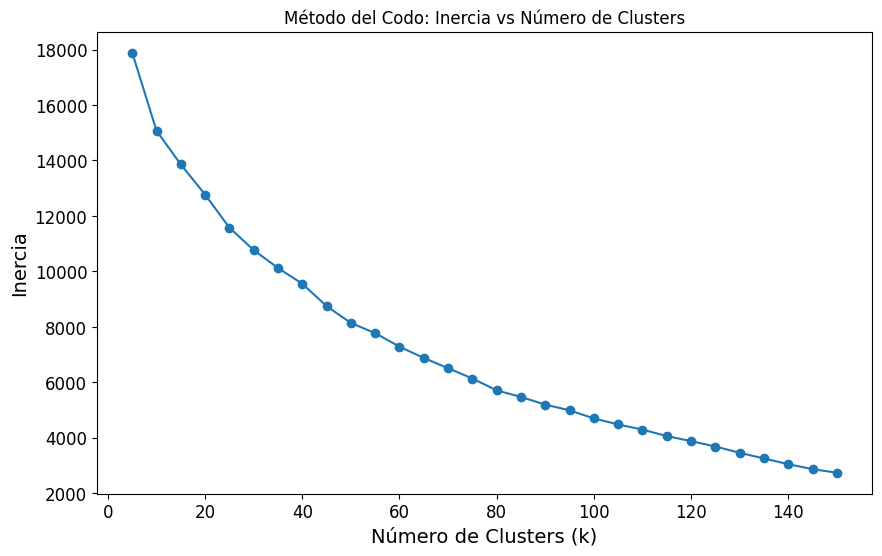

In [26]:
# Graficar el método del codo usando la inercia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Método del Codo: Inercia vs Número de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [27]:
# Asignar el mejor modelo basado en el score de silueta a la variable `best_model`
best_model = KMeans(n_clusters=best_k_silhouette, random_state=42)
best_model.fit(X_train_pca)

KMeans(n_clusters=145, random_state=42)

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

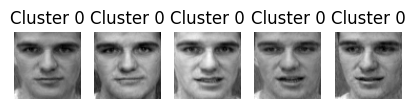

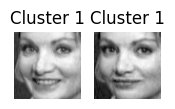

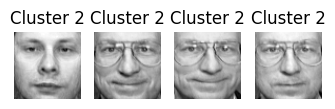

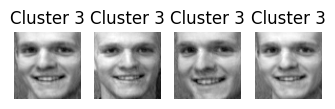

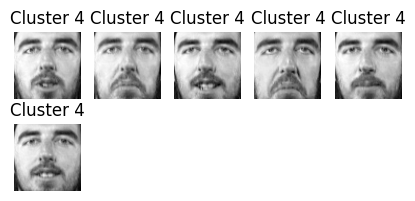

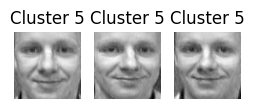

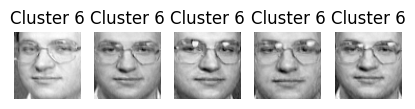

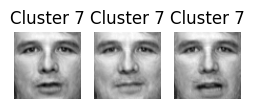

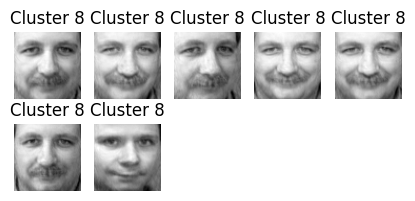

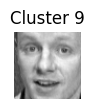

In [28]:
# Definir una función para visualizar las caras utilizando PCA inverso
def plot_faces_inverse(faces_transformed, labels, n_cols=5):
    faces = pca.inverse_transform(faces_transformed)
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# Visualizar las caras asignadas a los 10 primeros clústeres
plot_faces_inverse(X_train_pca[best_model.labels_ == 0][:10], labels=["Cluster 0"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 1][:10], labels=["Cluster 1"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 2][:10], labels=["Cluster 2"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 3][:10], labels=["Cluster 3"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 4][:10], labels=["Cluster 4"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 5][:10], labels=["Cluster 5"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 6][:10], labels=["Cluster 6"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 7][:10], labels=["Cluster 7"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 8][:10], labels=["Cluster 8"]*10)
plot_faces_inverse(X_train_pca[best_model.labels_ == 9][:10], labels=["Cluster 9"]*10)


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entrenar el clasificador RandomForest
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Predecir en el conjunto de validación
y_pred_validation = rf_classifier.predict(X_valid_pca)

# Calcular la precisión en el conjunto de validación
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print("Precisión en el conjunto de validación:", accuracy_validation)


Precisión en el conjunto de validación: 0.925


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [33]:

# Aplicar transformación para obtener las distancias a los centroides en el conjunto de entrenamiento
X_train_reduced = best_model.transform(X_train_pca)

# Aplicar transformación para obtener las distancias a los centroides en el conjunto de validación
X_validation_reduced = best_model.transform(X_valid_pca)

# Entrenar el clasificador RandomForest en el conjunto reducido
rf_classifier_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
rf_classifier_reduced.fit(X_train_reduced, y_train)

# Predecir en el conjunto de validación reducido
y_pred_validation_reduced = rf_classifier_reduced.predict(X_validation_reduced)

# Calcular la precisión en el conjunto de validación reducido
accuracy_validation_reduced = accuracy_score(y_validation, y_pred_validation_reduced)
print("Precisión en el conjunto de validación (con reducción de dimensionalidad):", accuracy_validation_reduced)


Precisión en el conjunto de validación (con reducción de dimensionalidad): 0.75


### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [35]:
best_accuracy = 0
best_k = None

for k in range(5, 151, 5):
    # Entrenar un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    
    # Transformar los conjuntos de entrenamiento y validación para obtener las distancias a los centroides
    X_train_reduced = kmeans.transform(X_train_pca)
    X_validation_reduced = kmeans.transform(X_valid_pca)
    
    # Entrenar un clasificador RandomForest en el conjunto reducido
    rf_classifier_reduced = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_classifier_reduced.fit(X_train_reduced, y_train)
    
    # Evaluar el rendimiento en el conjunto de validación
    accuracy_validation_reduced = accuracy_score(y_validation, rf_classifier_reduced.predict(X_validation_reduced))
    
    # Actualizar el mejor rendimiento y el mejor k si es necesario
    if accuracy_validation_reduced > best_accuracy:
        best_accuracy = accuracy_validation_reduced
        best_k = k

print("Mejor número de clusters k:", best_k)
print("Mejor precisión en el conjunto de validación:", best_accuracy)


Mejor número de clusters k: 75
Mejor precisión en el conjunto de validación: 0.825
